
### 6. Applying Anomaly Detection Workflow to Multiple Grid Data Points

To apply the entire workflow, including computing the climatology and detecting anomalies, on multiple grid data points (country-level analysis or bounding box), you can execute the `run` command via the command line and pass the required positional and optional arguments. This workflow provides implementations for multiple detection methods on multiple dates simultaneously.


##### Positional Arguments

-     data_path: Path to the ASCAT data.

-     aoi: Country name or bounding box coordinates in the tuple 'lon_min, lon_max , lat_min, lat_max'.

-     time_step: The time step for the climatology calculation. Supported values: month, dekad, week, bimonth, day.


##### Optional Arguments

-       -h, --help: Show the help message and exit.

-       --data_read_bulk : Read data in bulk mode. If set to 'True', all data will be read into memory.

-       --variable : The variable to be used for anomaly detection.

-       --year : The year(s) for the date parameters.

-       --month : The month(s) for the date parameters.

-       --dekad : The dekad(s) for the date parameters.

-       --week : The week(s) for the date parameters.

-       --bimonth : The bimonth(s) for the date parameters.

-       --day : The day(s) for the date parameters.

-       --methods : Anomaly detection methods. Supported methods: zscore, smapi-mean, 
                                 smapi-median, smdi, smca-mean, smca-median, smad, smci, smds, essmi, beta, gamma, abs-mean, abs-median.

-       --timespan : To work on a subset of the data. Example: ['2012-01-01', '2012-12-31'].

-       --fillna : Fill missing values.

-       --fillna_size : Fillna window size.

-       --smoothing : Apply smoothing.

-       --smooth_size : Smoothing window size.

-       --workers : The number of workers to use for multiprocessing.

-       --addi_retrive : Retrieve observations and  climatology values

-       --save_to : Save the output to a file at the specified path.

## Workflow Syntax

```bash
! smadi_run <data_directory> <country name or bbox> <time_step for climatology> [Options]
```

Note for the optional parameters 

-  **Multiple Methods**: To implement multiple methods, use the optional argument `--methods` followed by the desired methods.

    For example, to implement ZScore, SMAD, and Beta:
    ```bash
    --methods 'zscore' 'smad' 'beta'
    ```

-   **Multiple Dates**: To implement computations for multiple dates, provide the date components to the date parameters such as year, month, week, etc. , **respectively**

    For example, to implement computations for January, February 2022, and July 2021:
    ```bash
    --year 2022 2022 2021 --month 1 2 7
    ```


#### Workflow Usage Example (Spain June, July 2021 using monthly Zscore and SMAD)

In [1]:
# Compute four anomaly maps for Spain using the ZScore and SMAD methods for June and July 2021
! run_smadi     "/home/m294/ascat_dataset"        \
                "spain"                           \
                'month'                           \
                --variable "sm"                   \
                --year 2021 2021                  \
                --month 6 7                       \
                --methods 'zscore' 'smad'         \
                --fillna True                     \
                --fillna_size 3                   \
                --smoothing True                  \
                --smooth_size 31                  \
                --addi_retrive "var" "norm" "abs" \
                --save_to "output_df.csv"

In [2]:
import pandas as pd

workflow_df = pd.read_csv("output_df.csv")
workflow_df.dropna(inplace=True)
workflow_df.head()

,Unnamed: 0,point,cell,grid,lat,lon,zscore(2021-6),sm-mean(2021-6),norm-mean(2021-6),abs-mean(2021-6),zscore(2021-7),sm-mean(2021-7),norm-mean(2021-7),abs-mean(2021-7),smad(2021-6),norm-median(2021-6),abs-median(2021-6),smad(2021-7),norm-median(2021-7),abs-median(2021-7)
5,5,3865001,1249,Fibonacci (6.25 km),36.028694,-5.561161,0.013453,31.547784,31.493567,0.054216,0.284715,27.154701,26.068401,1.086300,0.150779,30.674441,0.873343,0.316017,25.006983,2.147718
10,10,3867585,1249,Fibonacci (6.25 km),36.056431,-5.623466,0.009931,17.819483,17.785313,0.034170,0.106970,20.508821,20.136111,0.372710,0.064738,17.493552,0.325931,0.083739,20.055218,0.453603
13,13,3869182,1249,Fibonacci (6.25 km),36.073578,-5.522654,0.175946,36.727798,36.036751,0.691046,0.440747,29.178583,27.606710,1.571874,0.233799,35.258501,1.469297,0.378327,26.981760,2.196823
15,15,3870169,1249,Fibonacci (6.25 km),36.084175,-5.685771,-0.099112,17.047304,17.410369,-0.363065,-0.062329,20.650748,20.890512,-0.239765,-0.038218,17.229306,-0.182002,-0.027507,20.797736,-0.146989
18,18,3871766,1249,Fibonacci (6.25 km),36.101330,-5.584959,-0.301901,16.005311,16.864132,-0.858821,-0.174176,16.600788,17.065579,-0.464790,-0.091814,16.365981,-0.360670,0.005729,16.577429,0.023359


#### Plot the anomaly maps

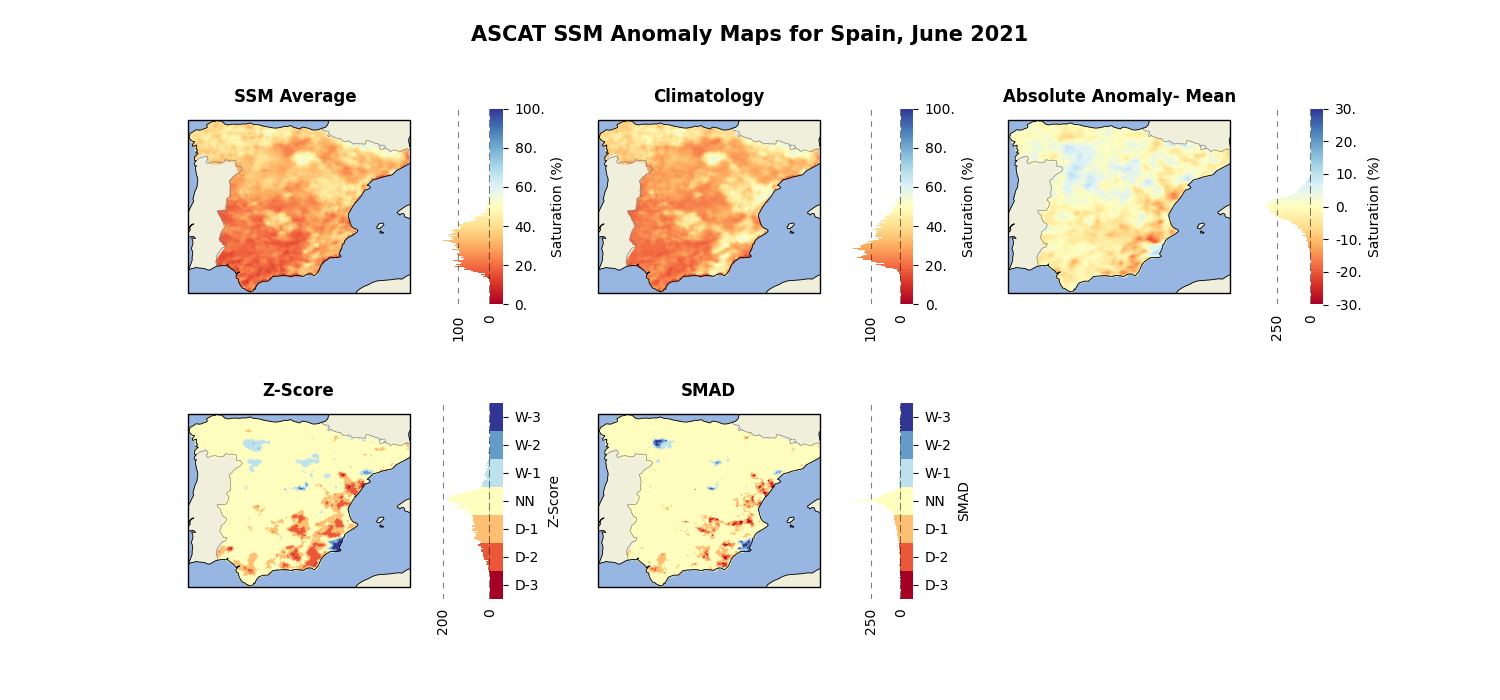

In [3]:
from smadi.map import plot_anomaly_maps

# Select the data columns to map
colms = [
    "sm-mean(2021-6)",
    "norm-mean(2021-6)",
    "abs-mean(2021-6)",
    "zscore(2021-6)",
    "smad(2021-6)",
]

# Set the title for each map
titles = ["SSM Average ", "Climatology", "Absolute Anomaly- Mean", "Z-Score", "SMAD"]

plot_anomaly_maps(
    figsize=(15, 7),
    ax_cols=3,
    ax_rows=2,
    df=workflow_df,
    df_colms=colms,
    figure_title="ASCAT SSM Anomaly Maps for Spain, June 2021",
    maps_titles=titles,
    add_gridlines=False,
    add_features=True,
    cb_min_max=[
        "sm_clim",
        "sm_clim",
        "abs",
        "anomaly",
        "anomaly",
    ],  # This param for compute min and max values for colorbar of each map according its values
    # "anomaly" for  anomaly maps and "sm_clim" for average/ climatology maps
    # "abs" for absolute anomaly maps. or set vmin and vmax manually
    # It should has the same length as df_colms and maps_titles
    cb_label=[
        "Saturation (%)",
        "Saturation (%)",
        "Saturation (%)",
        "Z-Score",
        "SMAD",
    ],  # This param for set the colorbar label for each map
)

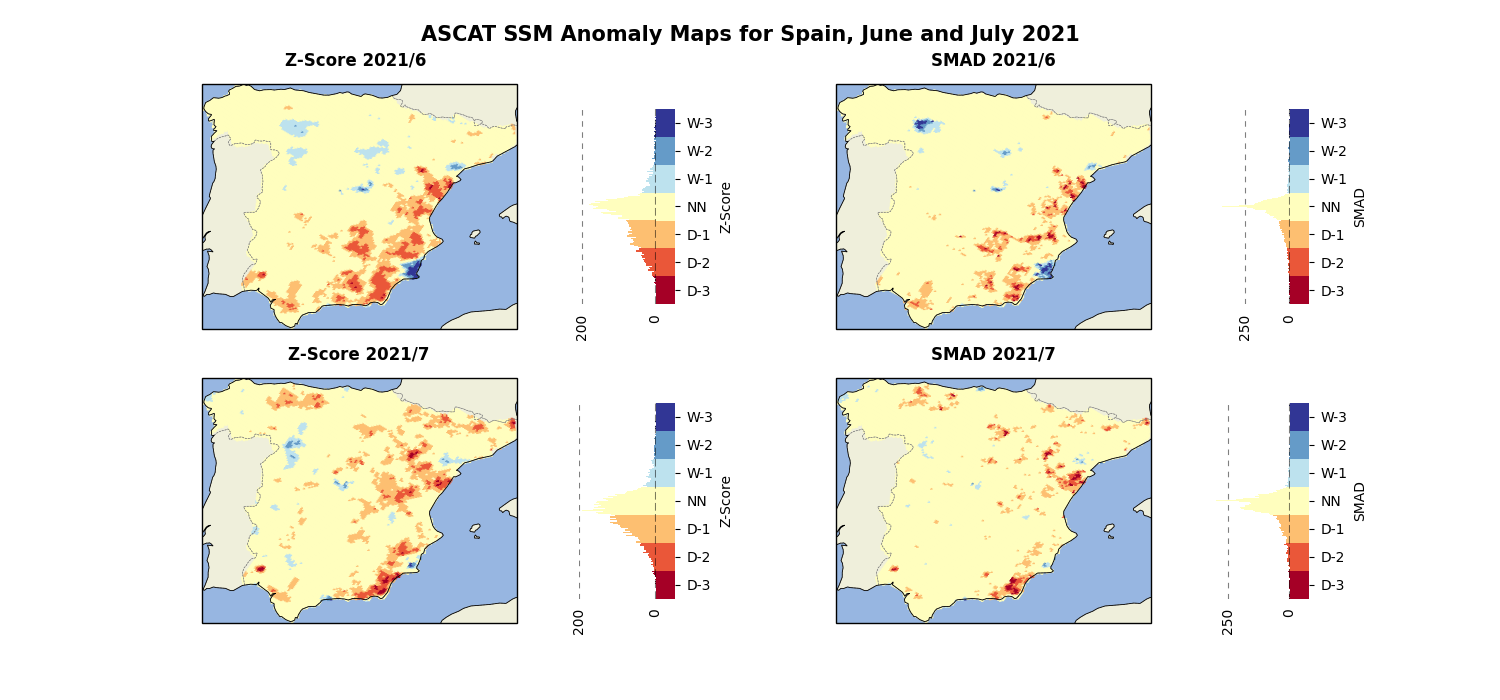

In [7]:
colms = [
    "zscore(2021-6)",
    "smad(2021-6)",
    "zscore(2021-7)",
    "smad(2021-7)",
]

# Set the title for each map
titles = ["Z-Score 2021/6 ", "SMAD 2021/6", "Z-Score 2021/7", "SMAD 2021/7"]

plot_anomaly_maps(
    figsize=(15, 7),
    ax_cols=2,
    ax_rows=2,
    df=workflow_df,
    df_colms=colms,
    figure_title="ASCAT SSM Anomaly Maps for Spain, June and July 2021",
    maps_titles=titles,
    add_gridlines=False,
    add_features=True,
    cb_min_max=["anomaly", "anomaly", "anomaly", "anomaly"],
    cb_label=["Z-Score", "SMAD", "Z-Score", "SMAD"],
)